Classification Report:
                         precision    recall  f1-score   support

         Decision Trees       1.00      1.00      1.00         4
Machine Learning Basics       1.00      0.50      0.67         4
        Neural Networks       0.67      0.50      0.57         4
 Reinforcement Learning       0.86      0.96      0.91        25

               accuracy                           0.86        37
              macro avg       0.88      0.74      0.79        37
           weighted avg       0.87      0.86      0.85        37



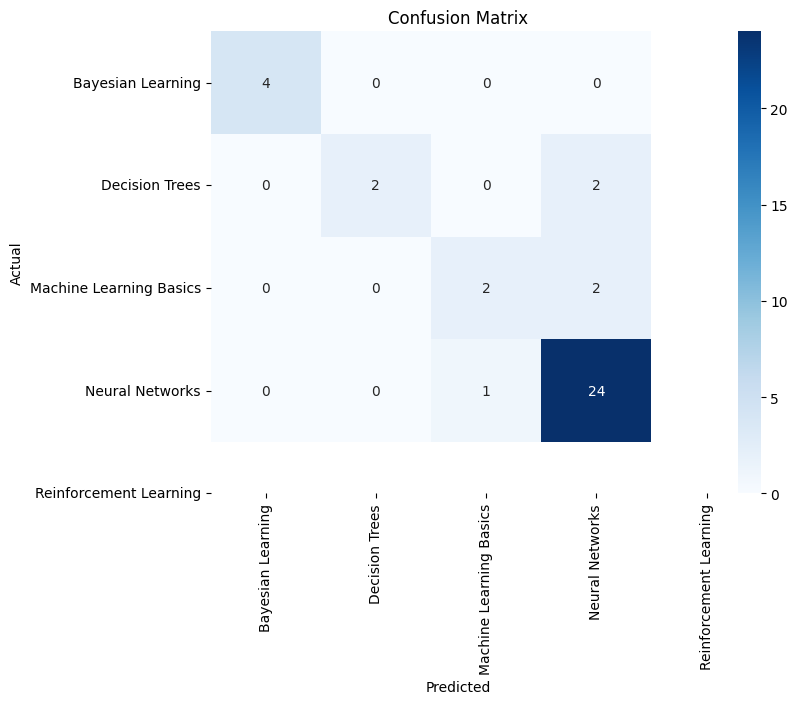

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the CSV File
df = pd.read_csv('dataSet.csv')

# Step 2: Preprocess the data
# Assuming we have no predefined category column, we'll create a new 'Category' column based on the question.
# Manually create a category based on question content (or use any other method if available)
# For demonstration, let's assume we have the categories listed below:
df['Category'] = df['Question'].apply(lambda x: 'Machine Learning Basics' if 'machine learning' in x.lower()
                                      else ('Decision Trees' if 'decision tree' in x.lower()
                                            else ('Neural Networks' if 'neural networks' in x.lower()
                                                  else ('Bayesian Learning' if 'bayesian' in x.lower()
                                                        else 'Reinforcement Learning'))))

# Step 3: Prepare Features and Labels
X = df['Question']  # Questions are the features
y = df['Category']  # Categories are the labels

# Convert text into feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_features = vectorizer.fit_transform(X)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Step 4: Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [11]:
# New questions to classify
new_questions = [
    "What is deep learning?",
    "How does a decision tree work?",
    "What are the key concepts of reinforcement learning?",
    "Explain the concept of a neural network.",
    "What is Bayes' rule used for?"
]

# Transform the new questions using the same vectorizer
new_questions_transformed = vectorizer.transform(new_questions)

# Predict the categories for the new questions
predictions = model.predict(new_questions_transformed)

# Display predictions
for question, prediction in zip(new_questions, predictions):
    print(f"Question: {question}\nPredicted Category: {prediction}\n")


Question: What is deep learning?
Predicted Category: Reinforcement Learning

Question: How does a decision tree work?
Predicted Category: Decision Trees

Question: What are the key concepts of reinforcement learning?
Predicted Category: Reinforcement Learning

Question: Explain the concept of a neural network.
Predicted Category: Reinforcement Learning

Question: What is Bayes' rule used for?
Predicted Category: Reinforcement Learning

